In [2]:
%matplotlib inline
import os

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

<module 'climatools.scripts.g1_threshold' from '/nuwa_cluster/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [3]:
analysis = scripts.Analysis()

In [4]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                          'radiation/crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band05_wn_980_1100',
                          'P_50_T_250',
                          'min_1.5e-25_max_5e-22_ng_5',
                          'wgt_1_.95_.9_.85_.8',
                          'tropical')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [5]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                               'radiation/crd/LW/examples',
                               'separate_g_groups',
                               'study__lblnew_g1_threshold',
                               'h2o',
                               'band05_wn_980_1100',
                               'P_50_T_250',
                               'min_1.5e-25_max_5e-22_ng_5',
                               'wgt_1_.95_.9_.85_.8',
                               'tropical')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [6]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = [1, 2, 3, 4, 5]
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [7]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [8]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [9]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [10]:
fig.display_hrefanchor()

In [11]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [12]:
table_dgdgs.display_hrefanchor()

In [13]:
for g in [1, 2, 3, 4, 5]:
    s = 'Table: flux. g-group {}'.format(g)
    html = climahtml.getHTML_hrefanchor(s)
    display.display(display.HTML(html))

# Figure: flux, cooling rate. g-group 1

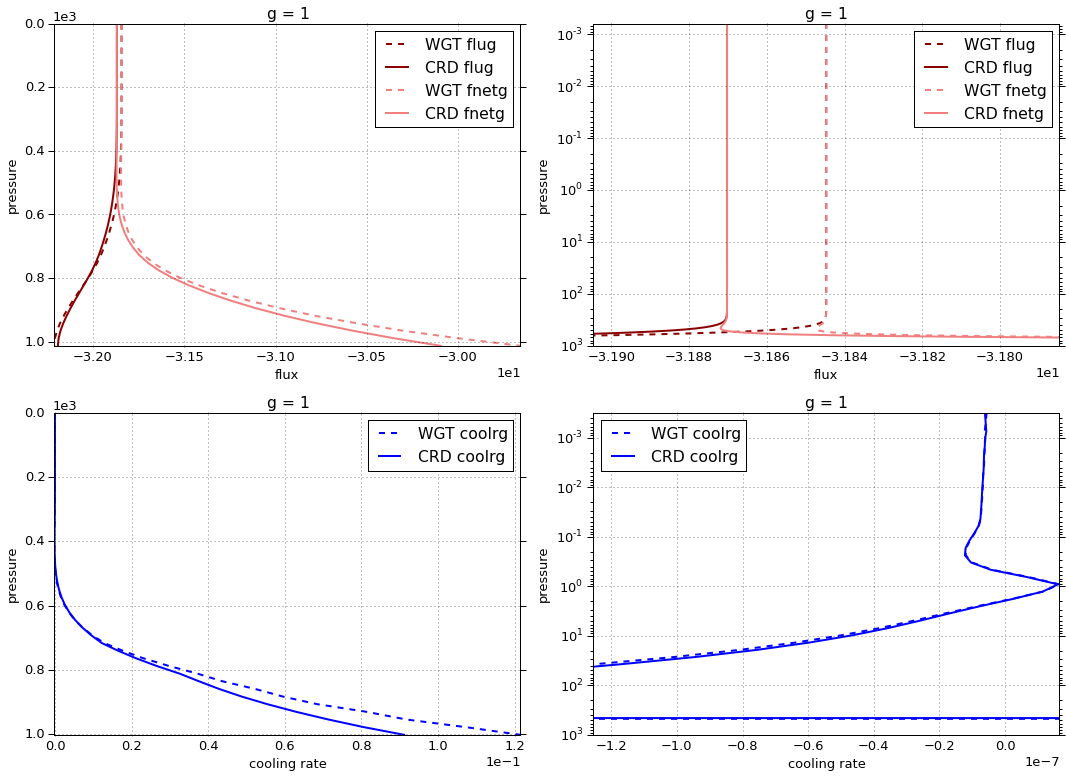

# Figure: flux, cooling rate. g-group 2

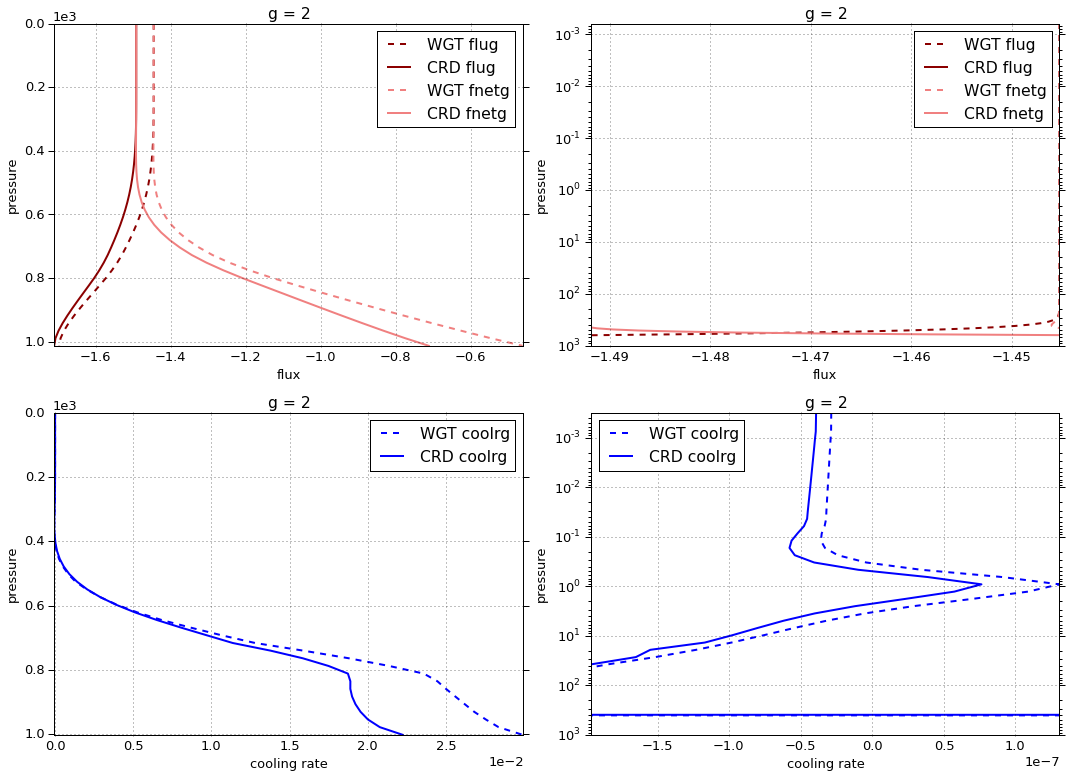

# Figure: flux, cooling rate. g-group 3

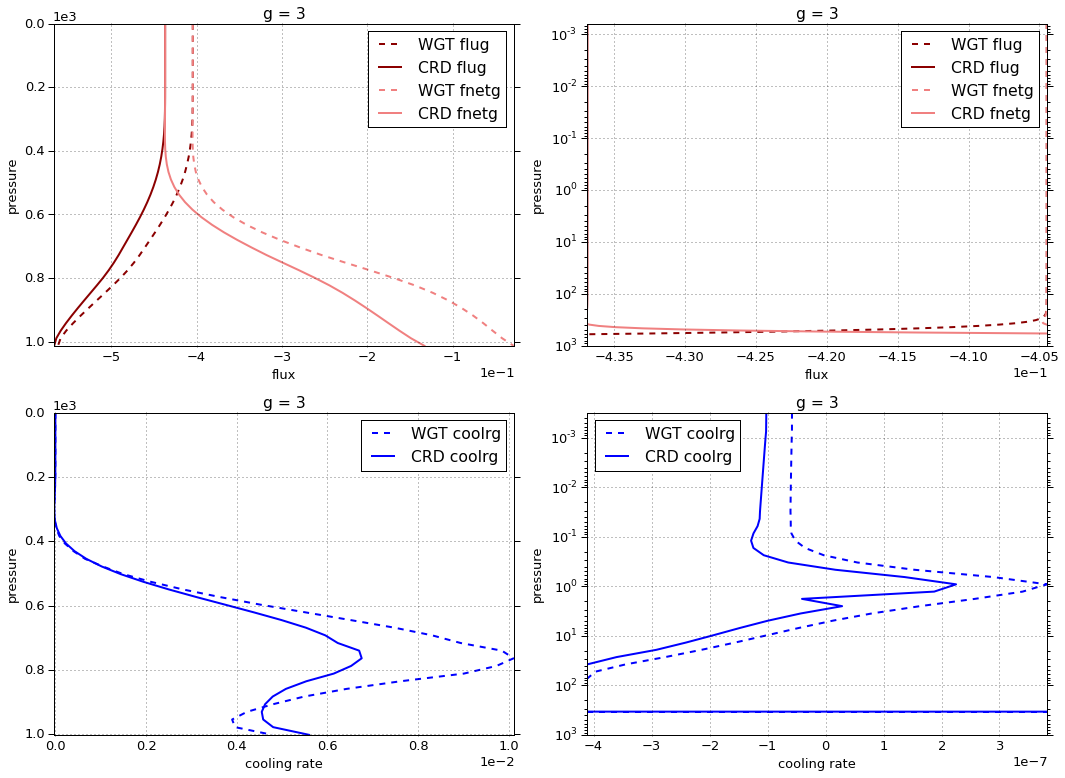

# Figure: flux, cooling rate. g-group 4

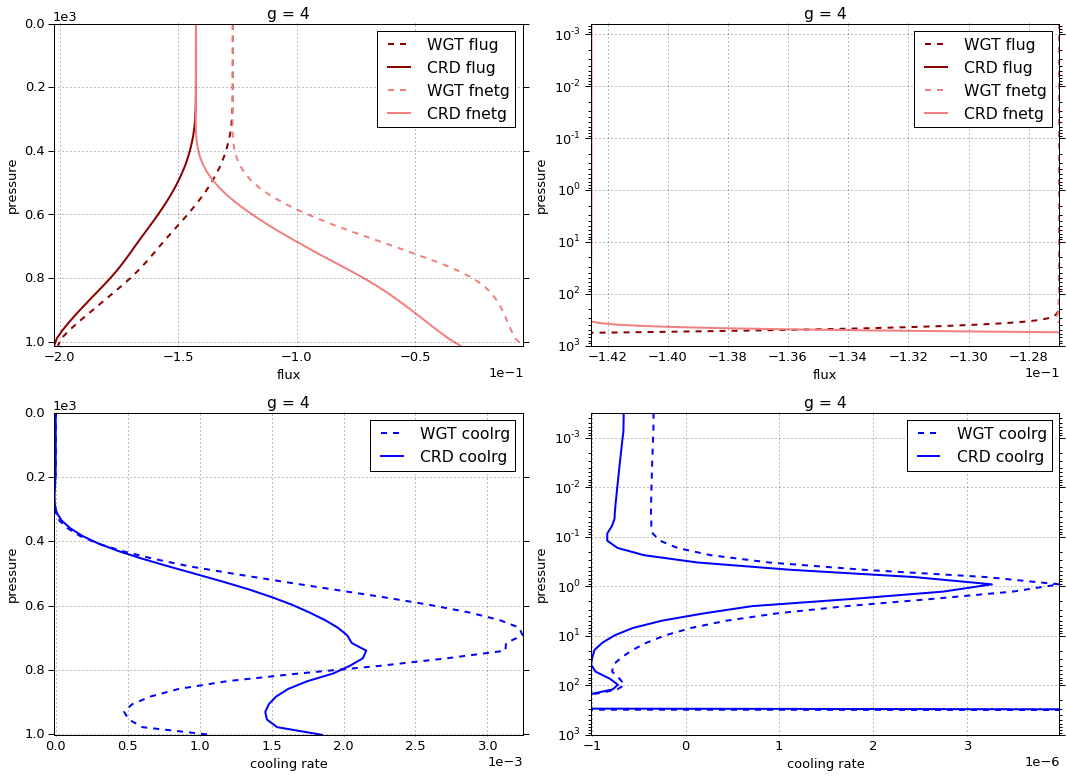

# Figure: flux, cooling rate. g-group 5

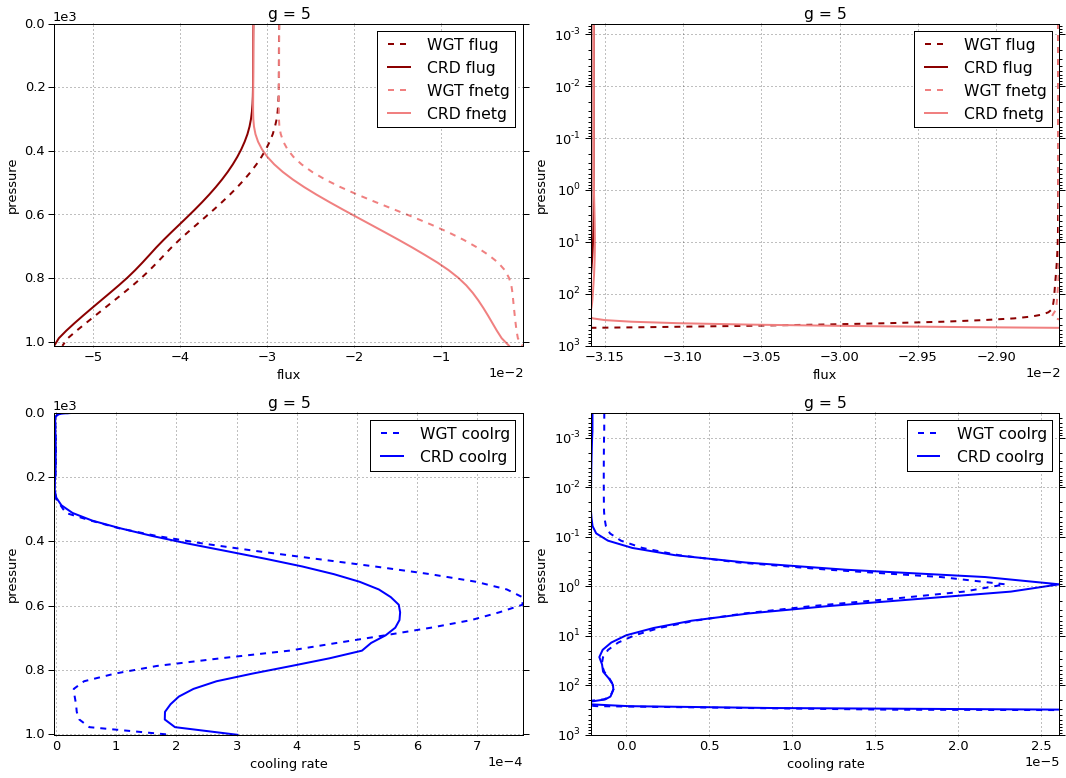

# Figure: flux, cooling rate. g-group total

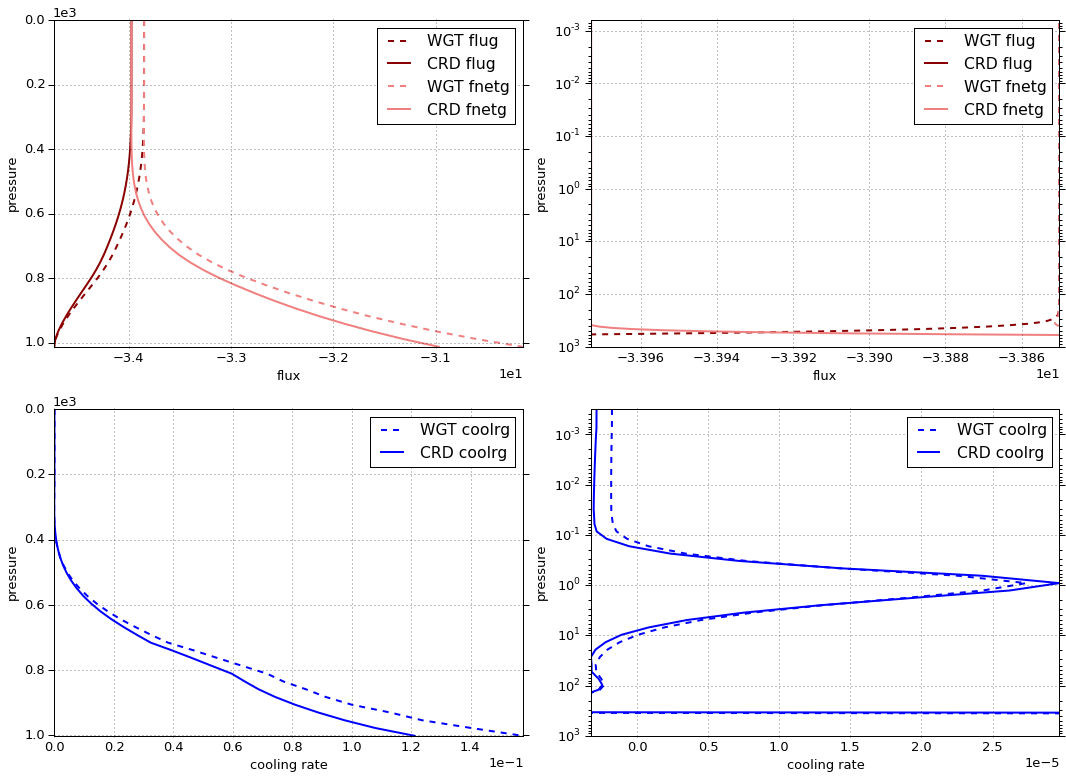

In [14]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [15]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg      fnetg
g pressure level                                
1 0        1     -31.870264  0.000000 -31.870264
  1013     76    -32.193979  2.101167 -30.092812
2 0        1      -1.491872  0.000000  -1.491872
  1013     76     -1.710758  0.999173  -0.711584
3 0        1      -0.436902  0.000000  -0.436902
  1013     76     -0.566969  0.433969  -0.132999
4 0        1      -0.142544  0.000000  -0.142544
  1013     76     -0.202442  0.171627  -0.030815
5 0        1      -0.031571  0.000000  -0.031571
  1013     76     -0.054494  0.052346  -0.002148


WGT


flug      fldg      fnetg
g pressure level                                
1 0        1     -31.844734  0.000000 -31.844734
  1013     76    -32.214352  2.557735 -29.656617
2 0        1      -1.445289  0.000000  -1.445289
  1013     76     -1.697376  1.235790  -0.461586
3 0        1      -0.404476  0.000000  -0.404476
  1013     76     -0.562468  0.534028  -0.028440
4 0        1      -0.126982  0.000000  -0.126982
  1013     76     -0.200896  0.196278  -0.004618
5 0        1      -0.028606  0.000000  -0.028606
  1013     76     -0.053549  0.052951  -0.000598


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0        1      0.025530  0.000000  0.025530
  1013     76    -0.020373  0.456568  0.436195
2 0        1      0.046583  0.000000  0.046583
  1013     76     0.013382  0.236617  0.249998
3 0        1      0.032425  0.000000  0.032425
  1013     76     0.004501  0.100059  0.104559
4 0        1      0.015561  0.000000  0.015561
  1013     76     0.001546  0.024651  0.026197
5 0        1      0.002965  0.000000  0.002965
  1013     76     0.000945  0.000605  0.001550

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer              
1 0.000312    1     -6.148174e-09
  1001.112500 75     9.114524e-02
2 0.000312    1     -3.920962e-08
  1001.112500 75     2.222798e-02
3 0.000312    1     -1.024145e-07
  1001.112500 75     5.591507e-03
4 0.000312    1     -6.603534e-07
  1001.112500 75     1.849939e-03
5 0.000312    1     -2.042101e-06
  1001.112500 75     3.012929e-04


WGT


coolrg
g pressure    layer              
1 0.000312    1     -5.619815e-09
  1001.112500 75     1.215066e-01
2 0.000312    1     -2.863644e-08
  1001.112500 75     2.989573e-02
3 0.000312    1     -5.810144e-08
  1001.112500 75     4.779554e-03
4 0.000312    1     -3.425081e-07
  1001.112500 75     1.074398e-03
5 0.000312    1     -1.330594e-06
  1001.112500 75     1.905928e-04


WGT - CRD


coolrg
g pressure    layer              
1 0.000312    1      5.283587e-10
  1001.112500 75     3.036134e-02
2 0.000312    1      1.057318e-08
  1001.112500 75     7.667748e-03
3 0.000312    1      4.431308e-08
  1001.112500 75    -8.119525e-04
4 0.000312    1      3.178453e-07
  1001.112500 75    -7.755404e-04
5 0.000312    1      7.115061e-07
  1001.112500 75    -1.107001e-04

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-33.973152,0.000000,-33.973152
1013,76,-34.728641,3.758282,-30.970358



WGT


,,flug,fldg,fnetg
pressure,level,,,
0,1,-33.850088,0.000000,-33.850088
1013,76,-34.728641,4.576782,-30.151859



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,1.230646e-01,0.000000,0.123065
1013,76,2.710000e-07,0.818499,0.818499


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.000003
1001.112500,75,0.121116



WGT


,,coolrg
pressure,layer,
0.000312,1,-0.000002
1001.112500,75,0.157447



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,0.000001
1001.112500,75,0.036331


In [16]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.925833,0.927602
2,0.050042,0.048875
3,0.016583,0.016196
4,0.005917,0.005785
5,0.001625,0.001542


In [17]:
g = 1

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 1

wgt                                           crd        \
              g level       flug          fldg      fnetg   g level   
pressure                                                              
0.000000      1     1 -31.844734  0.000000e+00 -31.844734   1     1   
0.000624      1     2 -31.844734  7.002946e-14 -31.844734   1     2   
0.000876      1     3 -31.844734  9.921269e-14 -31.844734   1     3   
0.001229      1     4 -31.844734  1.423374e-13 -31.844734   1     4   
0.001723      1     5 -31.844734  2.038707e-13 -31.844734   1     5   
0.002417      1     6 -31.844734  2.950506e-13 -31.844734   1     6   
0.003391      1     7 -31.844734  4.293295e-13 -31.844734   1     7   
0.004757      1     8 -31.844734  6.249485e-13 -31.844734   1     8   
0.006672      1     9 -31.844734  9.108979e-13 -31.844734   1     9   
0.009359      1    10 -31.844734  1.331963e-12 -31.844734   1    10   
0.013128      1    11 -31.844734  1.951093e-12 -31.844734   1    11   
0.018415      1    12 -31.844734  2.858656e-12 -31.844734   1    12   
0.025830      1    13 -31.844734  4.191418e-12 -31.844734   1    13   
0.036232      1    14 -31.844734  6.158769e-12 -31.844734   1    14   
0.050823      1    15 -31.844734  9.122753e-12 -31.844734   1    15   
0.071291      1    16 -31.844734  1.422772e-11 -31.844734   1    16   
0.100000      1    17 -31.844734  2.471597e-11 -31.844734   1    17   
0.140271      1    18 -31.844734  4.799654e-11 -31.844734   1    18   
0.196760      1    19 -31.844734  1.004177e-10 -31.844734   1    19   
0.275997      1    20 -31.844734  2.193310e-10 -31.844734   1    20   
0.387100      1    21 -31.844734  4.910770e-10 -31.844734   1    21   
0.543100      1    22 -31.844734  1.115561e-09 -31.844734   1    22   
0.761700      1    23 -31.844734  2.476937e-09 -31.844734   1    23   
1.068500      1    24 -31.844734  4.833185e-09 -31.844734   1    24   
1.498800      1    25 -31.844734  7.965948e-09 -31.844734   1    25   
2.102400      1    26 -31.844734  1.180800e-08 -31.844734   1    26   
2.949000      1    27 -31.844734  1.630286e-08 -31.844734   1    27   
4.136600      1    28 -31.844734  2.164323e-08 -31.844734   1    28   
5.802500      1    29 -31.844734  2.824820e-08 -31.844734   1    29   
8.139200      1    30 -31.844734  3.673363e-08 -31.844734   1    30   
...          ..   ...        ...           ...        ...  ..   ...   
323.525000    1    47 -31.845236  1.950674e-04 -31.845041   1    47   
347.300000    1    48 -31.845670  4.112956e-04 -31.845259   1    48   
371.075000    1    49 -31.846370  8.063507e-04 -31.845563   1    49   
394.850000    1    50 -31.847590  1.449464e-03 -31.846140   1    50   
418.625000    1    51 -31.849002  2.460665e-03 -31.846542   1    51   
442.400000    1    52 -31.850923  4.002777e-03 -31.846920   1    52   
466.175000    1    53 -31.853468  6.292088e-03 -31.847176   1    53   
489.950000    1    54 -31.856769  9.611264e-03 -31.847158   1    54   
513.725000    1    55 -31.860954  1.431560e-02 -31.846639   1    55   
537.500000    1    56 -31.866165  2.086124e-02 -31.845304   1    56   
561.275000    1    57 -31.872531  2.980609e-02 -31.842725   1    57   
585.050000    1    58 -31.880176  4.183305e-02 -31.838343   1    58   
608.825000    1    59 -31.889209  5.777399e-02 -31.831435   1    59   
632.600000    1    60 -31.899705  7.860042e-02 -31.821105   1    60   
656.375000    1    61 -31.911927  1.054617e-01 -31.806466   1    61   
680.150000    1    62 -31.925679  1.396383e-01 -31.786041   1    62   
703.925000    1    63 -31.941054  1.824680e-01 -31.758586   1    63   
727.700000    1    64 -31.957825  2.354829e-01 -31.722342   1    64   
751.475000    1    65 -31.977629  3.049679e-01 -31.672661   1    65   
775.250000    1    66 -32.000856  3.932681e-01 -31.607588   1    66   
799.025000    1    67 -32.026604  5.027368e-01 -31.523867   1    67   
822.800000    1    68 -32.054907  6.357494e-01 -31.419158   1    68   
846.575000    1    69 -32.083141  7.

In [18]:
g = 2

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 2

wgt                                         crd                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      2     1 -1.445289  0.000000e+00 -1.445289   2     1 -1.491872   
0.000624      2     2 -1.445289  4.469935e-13 -1.445289   2     2 -1.491872   
0.000876      2     3 -1.445289  6.309414e-13 -1.445289   2     3 -1.491872   
0.001229      2     4 -1.445289  8.977271e-13 -1.445289   2     4 -1.491872   
0.001723      2     5 -1.445289  1.286639e-12 -1.445289   2     5 -1.491872   
0.002417      2     6 -1.445289  1.853399e-12 -1.445289   2     6 -1.491872   
0.003391      2     7 -1.445289  2.679566e-12 -1.445289   2     7 -1.491872   
0.004757      2     8 -1.445289  3.883899e-12 -1.445289   2     8 -1.491872   
0.006672      2     9 -1.445289  5.639446e-12 -1.445289   2     9 -1.491872   
0.009359      2    10 -1.445289  8.198589e-12 -1.445289   2    10 -1.491872   
0.013128      2    11 -1.445289  1.192985e-11 -1.445289   2    11 -1.491872   
0.018415      2    12 -1.445289  1.737095e-11 -1.445289   2    12 -1.491872   
0.025830      2    13 -1.445289  2.530738e-11 -1.445289   2    13 -1.491872   
0.036232      2    14 -1.445289  3.690149e-11 -1.445289   2    14 -1.491872   
0.050823      2    15 -1.445289  5.420712e-11 -1.445289   2    15 -1.491872   
0.071291      2    16 -1.445289  8.313153e-11 -1.445289   2    16 -1.491872   
0.100000      2    17 -1.445289  1.394124e-10 -1.445289   2    17 -1.491872   
0.140271      2    18 -1.445289  2.567447e-10 -1.445289   2    18 -1.491872   
0.196760      2    19 -1.445289  5.048170e-10 -1.445289   2    19 -1.491872   
0.275997      2    20 -1.445289  1.033421e-09 -1.445289   2    20 -1.491872   
0.387100      2    21 -1.445289  2.169144e-09 -1.445289   2    21 -1.491872   
0.543100      2    22 -1.445289  4.625619e-09 -1.445289   2    22 -1.491872   
0.761700      2    23 -1.445289  9.688277e-09 -1.445289   2    23 -1.491872   
1.068500      2    24 -1.445289  1.813057e-08 -1.445289   2    24 -1.491872   
1.498800      2    25 -1.445289  2.906417e-08 -1.445289   2    25 -1.491872   
2.102400      2    26 -1.445290  4.204744e-08 -1.445289   2    26 -1.491872   
2.949000      2    27 -1.445290  5.659694e-08 -1.445289   2    27 -1.491872   
4.136600      2    28 -1.445290  7.292135e-08 -1.445289   2    28 -1.491872   
5.802500      2    29 -1.445290  9.177313e-08 -1.445289   2    29 -1.491872   
8.139200      2    30 -1.445290  1.142636e-07 -1.445289   2    30 -1.491872   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    2    47 -1.445882  3.027874e-04 -1.445579   2    47 -1.492453   
347.300000    2    48 -1.446366  6.292923e-04 -1.445737   2    48 -1.492924   
371.075000    2    49 -1.447124  1.215827e-03 -1.445908   2    49 -1.493658   
394.850000    2    50 -1.448207  2.153818e-03 -1.446053   2    50 -1.494680   
418.625000    2    51 -1.449647  3.601115e-03 -1.446046   2    51 -1.496054   
442.400000    2    52 -1.451565  5.764030e-03 -1.445800   2    52 -1.497855   
466.175000    2    53 -1.454006  8.904824e-03 -1.445101   2    53 -1.500149   
489.950000    2    54 -1.457052  1.334854e-02 -1.443704   2    54 -1.503004   
513.725000    2    55 -1.460799  1.947583e-02 -1.441323   2    55 -1.506482   
537.500000    2    56 -1.465318  2.769581e-02 -1.437622   2    56 -1.510631   
561.275000    2    57 -1.470640  3.871591e-02 -1.431924   2    57 -1.515492   
585.050000    2    58 -1.476772  5.296780e-02 -1.423805   2    58 -1.521077   
608.825000    2    59 -1.483776  7.108617e-02 -1.412690   2    59 -1.527387   
632.600000    2    60 -1.491626  9.374987e-02 -1.397876   2    60 -1.534391   
656.375000    2    61 -1.500264  1.216147e-01 -1.378649   2    61 -1.542026   
680.150000    2    62 -1.509594  1.554224e-01 -1.354172   2    62 -1.550216   
703.925000    2    63 -1.519587  1.954537e-01 -1.324134   2   

In [19]:
g = 3

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 3

wgt                                         crd                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      3     1 -0.404476  0.000000e+00 -0.404476   3     1 -0.436902   
0.000624      3     2 -0.404476  1.185684e-12 -0.404476   3     2 -0.436902   
0.000876      3     3 -0.404476  1.672922e-12 -0.404476   3     3 -0.436902   
0.001229      3     4 -0.404476  2.377605e-12 -0.404476   3     4 -0.436902   
0.001723      3     5 -0.404476  3.401888e-12 -0.404476   3     5 -0.436902   
0.002417      3     6 -0.404476  4.890475e-12 -0.404476   3     6 -0.436902   
0.003391      3     7 -0.404476  7.054063e-12 -0.404476   3     7 -0.436902   
0.004757      3     8 -0.404476  1.019890e-11 -0.404476   3     8 -0.436902   
0.006672      3     9 -0.404476  1.477000e-11 -0.404476   3     9 -0.436902   
0.009359      3    10 -0.404476  2.141481e-11 -0.404476   3    10 -0.436902   
0.013128      3    11 -0.404476  3.107507e-11 -0.404476   3    11 -0.436902   
0.018415      3    12 -0.404476  4.512191e-11 -0.404476   3    12 -0.436902   
0.025830      3    13 -0.404476  6.555272e-11 -0.404476   3    13 -0.436902   
0.036232      3    14 -0.404476  9.531536e-11 -0.404476   3    14 -0.436902   
0.050823      3    15 -0.404476  1.395792e-10 -0.404476   3    15 -0.436902   
0.071291      3    16 -0.404476  2.126327e-10 -0.404476   3    16 -0.436902   
0.100000      3    17 -0.404476  3.512704e-10 -0.404476   3    17 -0.436902   
0.140271      3    18 -0.404476  6.319578e-10 -0.404476   3    18 -0.436902   
0.196760      3    19 -0.404476  1.208074e-09 -0.404476   3    19 -0.436902   
0.275997      3    20 -0.404476  2.399261e-09 -0.404476   3    20 -0.436902   
0.387100      3    21 -0.404476  4.881003e-09 -0.404476   3    21 -0.436902   
0.543100      3    22 -0.404476  1.008279e-08 -0.404476   3    22 -0.436902   
0.761700      3    23 -0.404476  2.050733e-08 -0.404476   3    23 -0.436902   
1.068500      3    24 -0.404476  3.784456e-08 -0.404476   3    24 -0.436902   
1.498800      3    25 -0.404476  6.082902e-08 -0.404476   3    25 -0.436902   
2.102400      3    26 -0.404476  8.905454e-08 -0.404476   3    26 -0.436902   
2.949000      3    27 -0.404476  1.219631e-07 -0.404476   3    27 -0.436902   
4.136600      3    28 -0.404476  1.603114e-07 -0.404476   3    28 -0.436902   
5.802500      3    29 -0.404477  2.060734e-07 -0.404476   3    29 -0.436902   
8.139200      3    30 -0.404477  2.621290e-07 -0.404476   3    30 -0.436902   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    3    47 -0.405241  5.059809e-04 -0.404735   3    47 -0.437643   
347.300000    3    48 -0.405807  1.024250e-03 -0.404783   3    48 -0.438190   
371.075000    3    49 -0.406659  1.927396e-03 -0.404731   3    49 -0.439001   
394.850000    3    50 -0.407818  3.325650e-03 -0.404493   3    50 -0.440079   
418.625000    3    51 -0.409310  5.408222e-03 -0.403902   3    51 -0.441465   
442.400000    3    52 -0.411200  8.428250e-03 -0.402771   3    52 -0.443196   
466.175000    3    53 -0.413512  1.258251e-02 -0.400929   3    53 -0.445306   
489.950000    3    54 -0.416287  1.830526e-02 -0.397982   3    54 -0.447815   
513.725000    3    55 -0.419552  2.579462e-02 -0.393758   3    55 -0.450738   
537.500000    3    56 -0.423310  3.547602e-02 -0.387834   3    56 -0.454080   
561.275000    3    57 -0.427553  4.764323e-02 -0.379910   3    57 -0.457830   
585.050000    3    58 -0.432290  6.261915e-02 -0.369671   3    58 -0.461964   
608.825000    3    59 -0.437443  8.053603e-02 -0.356907   3    59 -0.466443   
632.600000    3    60 -0.442948  1.015873e-01 -0.341361   3    60 -0.471207   
656.375000    3    61 -0.448742  1.257064e-01 -0.323035   3    61 -0.476178   
680.150000    3    62 -0.454682  1.527133e-01 -0.301969   3    62 -0.481256   
703.925000    3    63 -0.460706  1.821386e-01 -0.278568   3   

In [20]:
g = 4

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 4

wgt                                         crd                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      4     1 -0.126982  0.000000e+00 -0.126982   4     1 -0.142544   
0.000624      4     2 -0.126982  8.675917e-12 -0.126982   4     2 -0.142544   
0.000876      4     3 -0.126982  1.225249e-11 -0.126982   4     3 -0.142544   
0.001229      4     4 -0.126982  1.745922e-11 -0.126982   4     4 -0.142544   
0.001723      4     5 -0.126982  2.507811e-11 -0.126982   4     5 -0.142544   
0.002417      4     6 -0.126982  3.622308e-11 -0.126982   4     6 -0.142544   
0.003391      4     7 -0.126982  5.252690e-11 -0.126982   4     7 -0.142544   
0.004757      4     8 -0.126982  7.637687e-11 -0.126982   4     8 -0.142544   
0.006672      4     9 -0.126982  1.112622e-10 -0.126982   4     9 -0.142544   
0.009359      4    10 -0.126982  1.622885e-10 -0.126982   4    10 -0.142544   
0.013128      4    11 -0.126982  2.369216e-10 -0.126982   4    11 -0.142544   
0.018415      4    12 -0.126982  3.460850e-10 -0.126982   4    12 -0.142544   
0.025830      4    13 -0.126982  5.057618e-10 -0.126982   4    13 -0.142544   
0.036232      4    14 -0.126982  7.396280e-10 -0.126982   4    14 -0.142544   
0.050823      4    15 -0.126982  1.089753e-09 -0.126982   4    15 -0.142544   
0.071291      4    16 -0.126982  1.681967e-09 -0.126982   4    16 -0.142544   
0.100000      4    17 -0.126982  2.857733e-09 -0.126982   4    17 -0.142544   
0.140271      4    18 -0.126982  5.344956e-09 -0.126982   4    18 -0.142544   
0.196760      4    19 -0.126982  1.061808e-08 -0.126982   4    19 -0.142544   
0.275997      4    20 -0.126982  2.173223e-08 -0.126982   4    20 -0.142544   
0.387100      4    21 -0.126982  4.500189e-08 -0.126982   4    21 -0.142544   
0.543100      4    22 -0.126982  9.329074e-08 -0.126982   4    22 -0.142544   
0.761700      4    23 -0.126982  1.877509e-07 -0.126982   4    23 -0.142544   
1.068500      4    24 -0.126982  3.402442e-07 -0.126982   4    24 -0.142544   
1.498800      4    25 -0.126982  5.357570e-07 -0.126982   4    25 -0.142544   
2.102400      4    26 -0.126983  7.651442e-07 -0.126982   4    26 -0.142544   
2.949000      4    27 -0.126983  1.016167e-06 -0.126982   4    27 -0.142544   
4.136600      4    28 -0.126983  1.285195e-06 -0.126981   4    28 -0.142545   
5.802500      4    29 -0.126983  1.574941e-06 -0.126981   4    29 -0.142545   
8.139200      4    30 -0.126983  1.890383e-06 -0.126981   4    30 -0.142546   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    4    47 -0.127675  5.729227e-04 -0.127102   4    47 -0.143196   
347.300000    4    48 -0.128145  1.112764e-03 -0.127032   4    48 -0.143615   
371.075000    4    49 -0.128808  2.007620e-03 -0.126801   4    49 -0.144205   
394.850000    4    50 -0.129664  3.334382e-03 -0.126329   4    50 -0.144950   
418.625000    4    51 -0.130722  5.213596e-03 -0.125508   4    51 -0.145864   
442.400000    4    52 -0.131998  7.797217e-03 -0.124201   4    52 -0.146953   
466.175000    4    53 -0.133504  1.121794e-02 -0.122286   4    53 -0.148222   
489.950000    4    54 -0.135271  1.561562e-02 -0.119655   4    54 -0.149676   
513.725000    4    55 -0.137223  2.109661e-02 -0.116127   4    55 -0.151306   
537.500000    4    56 -0.139409  2.774748e-02 -0.111662   4    56 -0.153106   
561.275000    4    57 -0.141807  3.557233e-02 -0.106234   4    57 -0.155065   
585.050000    4    58 -0.144377  4.454564e-02 -0.099831   4    58 -0.157165   
608.825000    4    59 -0.147100  5.457300e-02 -0.092527   4    59 -0.159385   
632.600000    4    60 -0.149922  6.548012e-02 -0.084441   4    60 -0.161694   
656.375000    4    61 -0.152788  7.703329e-02 -0.075755   4    61 -0.164050   
680.150000    4    62 -0.155624  8.894456e-02 -0.066679   4    62 -0.166404   
703.925000    4    63 -0.158380  1.008382e-01 -0.057542   4   

In [21]:
g = 5

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 5

wgt                                         crd                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      5     1 -0.028606  0.000000e+00 -0.028606   5     1 -0.031571   
0.000624      5     2 -0.028606  4.634306e-11 -0.028606   5     2 -0.031571   
0.000876      5     3 -0.028606  6.551614e-11 -0.028606   5     3 -0.031571   
0.001229      5     4 -0.028606  9.346184e-11 -0.028606   5     4 -0.031571   
0.001723      5     5 -0.028606  1.343918e-10 -0.028606   5     5 -0.031571   
0.002417      5     6 -0.028606  1.943247e-10 -0.028606   5     6 -0.031571   
0.003391      5     7 -0.028606  2.820854e-10 -0.028606   5     7 -0.031571   
0.004757      5     8 -0.028606  4.105880e-10 -0.028606   5     8 -0.031571   
0.006672      5     9 -0.028606  5.987241e-10 -0.028606   5     9 -0.031571   
0.009359      5    10 -0.028606  8.741593e-10 -0.028606   5    10 -0.031571   
0.013128      5    11 -0.028606  1.277381e-09 -0.028606   5    11 -0.031571   
0.018415      5    12 -0.028606  1.867675e-09 -0.028606   5    12 -0.031571   
0.025830      5    13 -0.028606  2.731842e-09 -0.028606   5    13 -0.031571   
0.036232      5    14 -0.028606  3.998542e-09 -0.028606   5    14 -0.031571   
0.050823      5    15 -0.028606  5.896458e-09 -0.028606   5    15 -0.031571   
0.071291      5    16 -0.028606  9.108809e-09 -0.028606   5    16 -0.031571   
0.100000      5    17 -0.028606  1.547218e-08 -0.028606   5    17 -0.031571   
0.140271      5    18 -0.028606  2.883443e-08 -0.028606   5    18 -0.031571   
0.196760      5    19 -0.028606  5.682934e-08 -0.028606   5    19 -0.031571   
0.275997      5    20 -0.028606  1.149106e-07 -0.028606   5    20 -0.031571   
0.387100      5    21 -0.028606  2.342059e-07 -0.028606   5    21 -0.031571   
0.543100      5    22 -0.028606  4.763555e-07 -0.028605   5    22 -0.031571   
0.761700      5    23 -0.028606  9.396257e-07 -0.028605   5    23 -0.031571   
1.068500      5    24 -0.028606  1.681061e-06 -0.028604   5    24 -0.031571   
1.498800      5    25 -0.028606  2.636277e-06 -0.028603   5    25 -0.031571   
2.102400      5    26 -0.028606  3.765767e-06 -0.028602   5    26 -0.031571   
2.949000      5    27 -0.028606  5.010945e-06 -0.028601   5    27 -0.031571   
4.136600      5    28 -0.028606  6.346286e-06 -0.028600   5    28 -0.031572   
5.802500      5    29 -0.028607  7.769405e-06 -0.028599   5    29 -0.031573   
8.139200      5    30 -0.028608  9.279074e-06 -0.028598   5    30 -0.031574   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    5    47 -0.029084  5.047998e-04 -0.028579   5    47 -0.032013   
347.300000    5    48 -0.029339  9.216613e-04 -0.028417   5    48 -0.032251   
371.075000    5    49 -0.029694  1.570788e-03 -0.028123   5    49 -0.032573   
394.850000    5    50 -0.030123  2.468689e-03 -0.027654   5    50 -0.032959   
418.625000    5    51 -0.030631  3.664216e-03 -0.026967   5    51 -0.033414   
442.400000    5    52 -0.031217  5.192127e-03 -0.026024   5    52 -0.033937   
466.175000    5    53 -0.031876  7.068882e-03 -0.024807   5    53 -0.034526   
489.950000    5    54 -0.032610  9.295667e-03 -0.023314   5    54 -0.035178   
513.725000    5    55 -0.033410  1.184685e-02 -0.021563   5    55 -0.035889   
537.500000    5    56 -0.034270  1.467296e-02 -0.019597   5    56 -0.036655   
561.275000    5    57 -0.035185  1.769874e-02 -0.017486   5    57 -0.037469   
585.050000    5    58 -0.036141  2.083725e-02 -0.015304   5    58 -0.038324   
608.825000    5    59 -0.037131  2.401141e-02 -0.013120   5    59 -0.039210   
632.600000    5    60 -0.038135  2.708892e-02 -0.011046   5    60 -0.040116   
656.375000    5    61 -0.039134  3.003246e-02 -0.009101   5    61 -0.041023   
680.150000    5    62 -0.040099  3.275215e-02 -0.007346   5    62 -0.041909   
703.925000    5    63 -0.041004  3.519609e-02 -0.005807   5   

In [22]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')